In [1]:
cd -q ~/research/Project_TaskSCCA/

In [2]:
import re 

import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn.plotting import cm

from src.utils import unflatten, save_pkl, load_pkl
from src.visualize import set_text_size

sns.set_style({"font.sans-serif": ["Arial"]})
sns.set_context('paper', font_scale=1.5)

In [3]:
X_clean = np.load('data/processed/X_clean.npy')
Y_clean = np.load('data/processed/Y_clean.npy')
X_mask = np.load('data/processed/X_mask.npy')
sig_mod = load_pkl('models/sig_95th.pkl')
model = load_pkl('models/full_model_95th.pkl')

path_master = 'data/interim/df_master_p178.pkl'
df_master = pd.read_pickle(path_master)
task_labels = ['Digit Span', 'Verbal Fluency', 'Picture Naming',
                'TS-Flexibility', 'TS-Inhibition', 'Four Mountains',
                'Unusual Uses', 'RAPM', 'Paired Associate',
                'Semantics - Strength', 'Semantics - Modality',
                'Semantics - Specificity', 'Semantics - Feature Matching'
                ]

df_es = pd.read_pickle('./data/interim/CS_MWQ_prepro.pkl')

# Plot the task canoncial vecotrs

['Digit Span', 'Category Fluency', 'Picture Naming', 'TS-Flexibility', 'TS-Inhibition', 'Four Mountains', 'Unusual Uses', 'RAPM', 'Paired Associate', 'Semantics - Strength', 'Semantics - Modality', 'Semantics - Specificity', 'Semantics - Feature Matching']


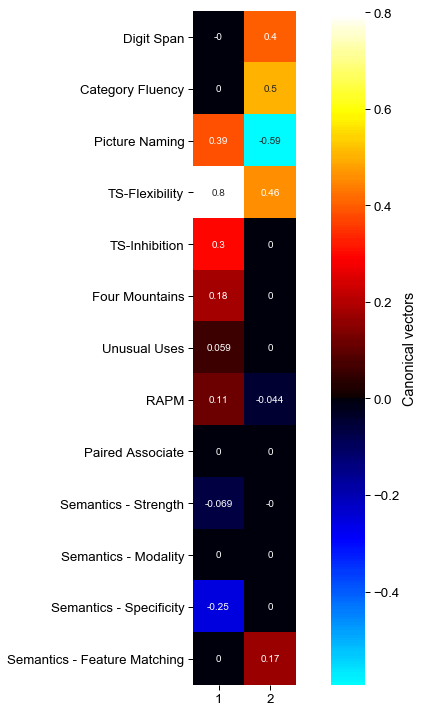

In [10]:
# change verbal fluency to category fluency and reverse the sign for presentation
print(task_labels)
task_labels[1] = 'Category Fluency'
sig_mod['v'][1, :]  = sig_mod['v'][1, :] * -1 

f, ax = plt.subplots(1, figsize=(10, 10))
df_v = pd.DataFrame(sig_mod['v'], 
                    index=task_labels, 
                    columns=['1', '2'])
sns.heatmap(df_v,
            center=0,
            square=True, annot=True,
            cbar_kws={'label': 'Canonical vectors'},
            cmap='cold_hot')

f.tight_layout()
f.savefig('./reports/figures/S1-cognitive_task_heatmap.png', dpi=300, transparent=True)
df_v['1'].to_csv(f"reports/manuscript/mode_1_task.txt", sep='\t')
df_v['2'].to_csv(f"reports/manuscript/mode_2_task.txt", sep='\t')

## word cloud color generation

0.8023016448947715
-0.8023016448947715


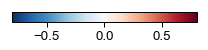

In [12]:
import matplotlib.colors as mcolor
import matplotlib.colorbar as mcb
import matplotlib.cm as mcm

# load the principle vector and mind-wandering labels
df_pc = pd.DataFrame(sig_mod['v'], 
                     index=task_labels,
                     columns=['1', '2'])

pv_in_hex= []
vmax = np.abs(df_pc.values).max()
vmin = -vmax
for i in range(df_pc.values.shape[1]):
    rescale = (df_pc.values[:,i] - vmin) / (vmax - vmin)
    colors_hex = []
    for c in mcm.RdBu_r(rescale):
        colors_hex.append(mcolor.to_hex(c))
    pv_in_hex.append(colors_hex)
colors_hex = np.array(pv_in_hex).T
df_v_color = pd.DataFrame(colors_hex, columns=df_pc.columns, index=df_pc.index)
print(vmax)
print(vmin)
set_text_size(10)

fig = plt.figure(figsize=(3, 0.8))
ax = fig.add_subplot(111)
cmap = mcm.RdBu_r
norm = mcolor.Normalize(vmin=vmin, vmax=vmax)
cb1 = mcb.ColorbarBase(ax, cmap=cmap,
                                norm=norm, orientation='horizontal')
plt.tight_layout()
# plt.savefig('reports/figures/task_canonicalweights_wordcloud_cb.png', transparent=True, dpi=300)

In [13]:
for n in range(2):
    i = str(n + 1)
    df = pd.concat([df_pc[i], df_v_color[i]], axis=1)
    df.reset_index(level=0, inplace=True)
    df.columns = ['word', 'ori_weight', 'color']
    df['weight'] = np.round(np.abs(df['ori_weight'] * 100))
    df = df[['weight', 'word', 'color']]
    df.to_csv('reports/figures/CCA/task_canonicalweights_wordcloud_colors_{}.csv'.format(i))